<a href="https://colab.research.google.com/github/LisaPonsteen/Lisa-Ponsteen/blob/main/eindcode_neuraal_netwerk_voor_9x9_sudoku's_pws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import keras
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, BatchNormalization, Dense, Flatten, Reshape, MaxPooling2D, Dropout, Activation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import copy

device_name = tf.test.gpu_device_name() #connect to GPU
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#sample maken van grotere dataset
df = pd.read_csv('/content/1 mil 9x9 sudoku.csv', dtype='str')

sample_df  = df.sample(500000)
sample_df.to_csv("500k 9x9 sudokus.csv")

sample_df.head() #check of de de getallen er correct uitzien met een preview

,quizzes,solutions
70479,0109000072040530900671208003000080040780300500...,5139864272847531969671248353526789141784396526...
125185,1000900400080056005908430200620049030070600040...,1236978457481256395968431278625749139173682544...
213858,5003701940030050000084000600350090124006005092...,5623781949431657281784923657358496124816275392...
301610,0542006000000030006785002049020804004000090750...,3542786191294637586785912349127854634631298755...
421959,6903007002004089000000000310500204809006001000...,6983157242134789567452968313561274899246831758...


In [ ]:
#check wat de namen van de kolommen zijn
df.head()
df.columns

Index(['Unnamed: 0', 'quizzes', 'solutions'], dtype='object')

In [ ]:
df = pd.read_csv('/content/10k 9x9 sudokus.csv', dtype='str') #data inladen

que = df['quizzes'].values
soln = df['solutions']

#voeg de puzzels toe aan een array. Als dit niet lukt, sla dan de index op zodat zowel van de puzzel als de solution dit datapunt eruit gehaald kan worden.
te_deleten_labels= []
te_deleten_feat= []
feat = []
label = []

for i in que:
    try:
      x = np.array([int(j) for j in i]).reshape((9,9,1))
      feat.append(x)
    except:
      print(len(x))
      print("zeker niet true")
      ind = len(feat)
      te_deleten_labels.append(ind)

for i in soln:
  try:
    a = len(label) + 1
    if a not in te_deleten_labels:
      x = np.array([int(j) for j in i]).reshape((81,1)) - 1 #81
      label.append(x)
    else:
      print(True)
      te_deleten_labels.remove(a)
  except:
    print(len(x))
    print('ook true')
    ind = len(label)
    print(len(feat))
    feat.pop(ind)
    print(len(feat))

print(feat[0].shape)
feat = np.array(feat)
feat = feat/9
feat -= .5

print(feat[0].shape)
label = np.array(label)
label = to_categorical(label) #alleen bij loss='categorical_crossentropy'

print(feat[0].shape)

#splitting data
x_train, x_temp, y_train, y_temp = train_test_split(feat, label, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

(9, 9, 1)
(9, 9, 1)
(9, 9, 1)


Epoch 1/200
219/219 [==============================] - ETA: 0s - loss: 2.2319 - accuracy: 0.1527
Epoch 1: val_accuracy improved from -inf to 0.13979, saving model to best_model.h5
219/219 [==============================] - 14s 9ms/step - loss: 2.2319 - accuracy: 0.1527 - val_loss: 2.1929 - val_accuracy: 0.1398
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 1.9395 - accuracy: 0.2573
Epoch 2: val_accuracy improved from 0.13979 to 0.19083, saving model to best_model.h5
219/219 [==============================] - 2s 8ms/step - loss: 1.9390 - accuracy: 0.2574 - val_loss: 2.0885 - val_accuracy: 0.1908
Epoch 3/200
214/219 [============================>.] - ETA: 0s - loss: 1.6532 - accuracy: 0.3839
Epoch 3: val_accuracy improved from 0.19083 to 0.32613, saving model to best_model.h5
219/219 [==============================] - 2s 9ms/step - loss: 1.6523 - accuracy: 0.3841 - val_loss: 1.7706 - val_accuracy: 0.3261
Epoch 4/200
217/219 [============================>.] - ETA: 0s - loss: 1.3162 - accuracy: 0.5185
Epoch 4: val_accuracy improved from 0.32613 to 0.40073, saving model to best_model.h5
219/219 [==============================] - 2s 8ms/step - loss: 1.3160 - accuracy: 0.5185 - val_loss: 1.5931 - val_accuracy: 0.4007
Epoch 5/200
217/219 [============================>.] - ETA: 0s - loss:

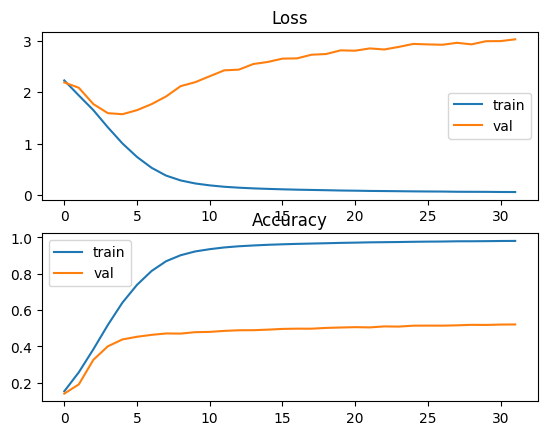

In [ ]:
def get_model():
  with tf.device('/device:GPU:0'):
    model = keras.models.Sequential()

    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(81*9))
    model.add(Reshape((-1, 9)))
    model.add(Activation('softmax'))
    return model

model = get_model()

#train model
opt = keras.optimizers.Adam(learning_rate=.001)
#of opt = tf.keras.optimizers.Adam(learning_rate=.001, beta_1=0.9), opt = keras.optimizers.SGD(lr=0.015, momentum=0.9) of opt = keras.optimizers.SGD()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15) #optie 1
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=7, min_delta=0.01) #optie 2
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=200, callbacks=[es, mc])
# load  saved model
saved_model = load_model('best_model.h5')

# evaluate model
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, val_acc = saved_model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Validation: %.3f' % (train_acc, val_acc))

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
#evalueer model op hoeveel sudoku's helemaal goed zijn
def indices_to_sudoku(predictions):
    sudoku_solutions = np.argmax(predictions, axis=-1) + 1  # Veronderstel dat 0-indexed is, dus voeg 1 toe
    return sudoku_solutions.reshape(9, 9, -1)
def check_solution(solution, actual_solution):
    return np.array_equal(solution, actual_solution)

predicted_sudokus = []
actual_sudokus = []
correct_count = 0
# x_test zijn de invoergegevens en y_test zijn de daadwerkelijke oplossingen

predictions = model.predict(x_test)
for answer in predictions:
  predicted_sudokus.append(indices_to_sudoku(answer))

for puzzle in (y_test):
  actual_sudokusa = puzzle * 9
  actual_sudokus.append(indices_to_sudoku(actual_sudokusa))

for predicted, actual in zip(predicted_sudokus, actual_sudokus ):
    if check_solution(predicted, actual):
        correct_count += 1

print(predicted_sudokus[0])
print(actual_sudokus[0]) #om te checken of predicted en actual gelijke vorm is

accuracy = correct_count / len(actual_sudokus)
print(f"Modelnauwkeurigheid: {accuracy * 100:.2f}%")

print(correct_count)
print(len(actual_sudokus))

47/47 [==============================] - 0s 2ms/step
[[[3]
  [6]
  [5]
  [6]
  [7]
  [8]
  [2]
  [3]
  [9]]

 [[1]
  [3]
  [6]
  [6]
  [2]
  [9]
  [7]
  [6]
  [5]]

 [[6]
  [2]
  [4]
  [1]
  [2]
  [3]
  [7]
  [7]
  [8]]

 [[9]
  [9]
  [4]
  [3]
  [8]
  [1]
  [5]
  [6]
  [6]]

 [[6]
  [5]
  [7]
  [9]
  [2]
  [4]
  [2]
  [4]
  [8]]

 [[2]
  [8]
  [1]
  [6]
  [5]
  [7]
  [9]
  [1]
  [4]]

 [[1]
  [4]
  [1]
  [8]
  [6]
  [7]
  [7]
  [9]
  [9]]

 [[8]
  [4]
  [1]
  [8]
  [9]
  [5]
  [5]
  [7]
  [3]]

 [[5]
  [1]
  [9]
  [7]
  [3]
  [4]
  [8]
  [5]
  [7]]]
[[[3]
  [6]
  [5]
  [2]
  [7]
  [8]
  [1]
  [4]
  [9]]

 [[1]
  [7]
  [8]
  [4]
  [6]
  [9]
  [3]
  [2]
  [5]]

 [[9]
  [2]
  [4]
  [5]
  [1]
  [3]
  [6]
  [8]
  [7]]

 [[4]
  [9]
  [1]
  [3]
  [8]
  [2]
  [7]
  [5]
  [6]]

 [[6]
  [5]
  [7]
  [9]
  [4]
  [1]
  [2]
  [3]
  [8]]

 [[2]
  [8]
  [3]
  [6]
  [5]
  [7]
  [9]
  [1]
  [4]]

 [[7]
  [3]
  [6]
  [8]
  [2]
  [5]
  [4]
  [9]
  [1]]

 [[8]
  [4]
  [2]
  [1]
  [9]
  [6]
  [5]
  [7]
  [

In [ ]:
def denorm(a):

    return (a+.5)*9
def norm(a):

    return (a/9)-.5

def inference_sudoku(sample):
  '''
        This function solves the sudoku by filling blank positions one by one.
  '''
  feat = copy.copy(sample)

  while(1):

        #predicting values
        out = model.predict(feat.reshape((1,9,9,1)), verbose=0) #verbose is hoeveel info wordt getoond
        out = out.squeeze()

        #getting predicted values
        pred = np.argmax(out, axis=1).reshape((9,9))+1
        #getting probablity of each values
        prob = np.around(np.max(out, axis=1).reshape((9,9)), 2)
#creating mask for blank values
        feat = denorm(feat).reshape((9,9))
        #i.e it will give you a 2d array with True/1 and False/0 where 0 is found and where 0 is not found respectively
        mask = (feat==0)

        #if there are no 0 values left than break
        if(mask.sum()==0):
            break

        #getting probablities of values where 0 is present that is our blank values we need to fill
        prob_new = prob*mask

        #getting highest probablity index
        ind = np.argmax(prob_new)
        #getting row and col
        x, y = (ind//9), (ind%9)

        #getting predicted value at that cell
        #assigning that value
        feat[x][y] = pred [x][y]
        #again passing this sudoku with one value added to model to get next most confident value
        feat = norm(feat)
        return pred

def solve_sudoku(game):

    game = game.replace('\n', '')
    game = game.replace(' ', '')
    game = np.array([int(j) for j in game]).reshape((9,9,1))
    game = norm(game)
    game = inference_sudoku(game)
    return game

#vul hier de sudoku in die je wil oplossen. Vul een '0' in voor een leeg vak.
game = '''
          0 8 0 0 3 2 0 0 1
          7 0 3 0 8 0 0 0 2
          5 0 0 0 0 7 0 3 0
          0 5 0 0 0 1 9 7 0
          6 0 0 7 0 9 0 0 8
          0 4 7 2 0 0 0 5 0
          0 2 0 6 0 0 0 0 9
          8 0 0 0 9 0 3 0 5
          3 0 0 8 2 0 0 1 0
      '''

game = solve_sudoku(game)

print('solved puzzle:\n')
# print(game)
for i in game:
    print(i)
print('\n')

np.sum(game, axis=1) #als niet alles 45 is, is het zowiezo fout.

solved puzzle:

[4 8 6 9 3 2 7 8 1]
[7 9 3 5 8 6 4 9 2]
[5 1 2 9 6 7 6 3 6]
[2 5 8 3 6 1 9 7 3]
[6 3 1 7 4 9 1 2 8]
[9 4 7 2 6 8 6 5 6]
[1 2 5 6 7 3 8 4 9]
[8 6 6 1 9 4 3 2 5]
[3 6 4 8 2 5 8 1 6]




array([48, 53, 45, 44, 41, 53, 45, 44, 43])